In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

import tensorflow as tf

import gpflow
from gpflow.utilities import read_values, multiple_assign, set_trainable
from gpflow.inducing_variables import InducingPoints
import gpmaniflow
from gpmaniflow.models.SVGP import SVGP

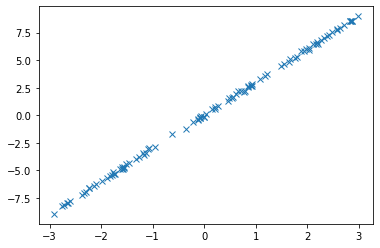

In [2]:
pX = np.linspace(-5.0, 5.0, 300)[:, None]
X = np.random.uniform(-3, 3, 100)[:, None]
Y = 3 * X + np.random.randn(*X.shape) * 0.1
Z = np.linspace(-5, 5, 50)[:, None]

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

plt.plot(X,Y ,"x")

In [3]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(2000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))


Step: 0, Mini batch elbo: -1499.2395738167434
Step: 50, Mini batch elbo: -593.5007826429656
Step: 100, Mini batch elbo: -217.6381726024232
Step: 150, Mini batch elbo: -166.69322586914083
Step: 200, Mini batch elbo: -153.24495047315392
Step: 250, Mini batch elbo: -149.0371853582511
Step: 300, Mini batch elbo: -146.10228065235574
Step: 350, Mini batch elbo: -143.7502716879505
Step: 400, Mini batch elbo: -141.35357097804342
Step: 450, Mini batch elbo: -138.98251666775198
Step: 500, Mini batch elbo: -136.270869775409
Step: 550, Mini batch elbo: -133.6696912579191
Step: 600, Mini batch elbo: -130.30423007775636
Step: 650, Mini batch elbo: -127.56274279602772
Step: 700, Mini batch elbo: -123.21390255452253
Step: 750, Mini batch elbo: -119.24610459128345
Step: 800, Mini batch elbo: -114.9791441277451
Step: 850, Mini batch elbo: -110.35483381398873
Step: 900, Mini batch elbo: -105.20333747573271
Step: 950, Mini batch elbo: -99.92315427304837
Step: 1000, Mini batch elbo: -94.64668318107374
Step

In [4]:
import gpmaniflow.samplers
from gpmaniflow.samplers import initialize_sampler

In [5]:
model.MatheronSampler = initialize_sampler()

I'm here


In [11]:
out1 = model.MatheronSampler(pX)
model.MatheronSampler = initialize_sampler()
out2 = model.MatheronSampler(pX)

I'm here


<tf.Tensor: shape=(1, 300, 1), dtype=float64, numpy=
array([[[-1.25745966e-01],
        [-1.50392064e-01],
        [-1.74392001e-01],
        [-1.97650740e-01],
        [-2.20078543e-01],
        [-2.41591260e-01],
        [-2.62110587e-01],
        [-2.81564290e-01],
        [-2.99886411e-01],
        [-3.17017427e-01],
        [-3.32904388e-01],
        [-3.47501023e-01],
        [-3.60767810e-01],
        [-3.72672016e-01],
        [-3.83187711e-01],
        [-3.92295741e-01],
        [-3.99983681e-01],
        [-4.06245751e-01],
        [-4.11082708e-01],
        [-4.14501707e-01],
        [-4.16516135e-01],
        [-4.17145425e-01],
        [-4.16414837e-01],
        [-4.14355224e-01],
        [-4.11002772e-01],
        [-4.06398720e-01],
        [-4.00589066e-01],
        [-3.93624252e-01],
        [-3.85558836e-01],
        [-3.76451153e-01],
        [-3.66362958e-01],
        [-3.55359072e-01],
        [-3.43507005e-01],
        [-3.30876589e-01],
        [-3.17539593e-01],
  

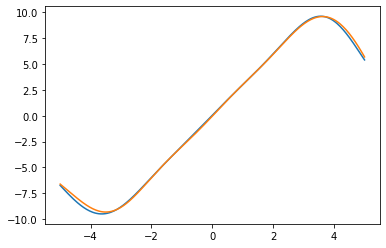

In [12]:
plt.plot(pX, out1[0,:,0])
plt.plot(pX, out2[0,:,0])

In [13]:
model.MatheronSampler = initialize_sampler(from_df = True)

I'm here


In [14]:
model.MatheronSampler(pX)

InvalidArgumentError: In[0] mismatch In[1] shape: 300 vs. 50: [300,300] [1,1,50,1] 0 0 [Op:BatchMatMulV2]